In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# **Data Loading and Preprocessing**

In [3]:
class DataLoader():
  def __init__(self):
    self.data = None

  def load_dataset(self, path):
    self.data=pd.read_csv(path)

  def preprocess_data(self):
    categorical_cols=["gender",
                      "ever_married",
                      "work_type",
                      "Residence_type",
                      "smoking_status"]

    encoded=pd.get_dummies(self.data[categorical_cols],prefix=categorical_cols)

    self.data=pd.concat([encoded,self.data],axis=1)
    self.data.drop(categorical_cols, axis=1, inplace=True)

    self.data.bmi = self.data.bmi.fillna(0)
    self.data.drop(["id"], axis=1, inplace=True)

  def get_data_split(self):
    X=self.data.iloc[:,:-1]
    y=self.data.iloc[:,-1]
    return train_test_split(X,y,test_size=0.20, random_state=2021)

  def oversample(self, X_train, y_train):
    oversample = RandomOverSampler(sampling_strategy='minority')

    x_np = X_train.to_numpy()
    y_np = y_train.to_numpy()
    x_np, y_np = oversample.fit_resample(x_np, y_np)

    x_over = pd.DataFrame(x_np, columns=X_train.columns)
    y_over = pd.Series(y_np, name=y_train.name)
    return x_over, y_over




In [4]:
data_loader = DataLoader()
data_loader.load_dataset(path='/content/healthcare-dataset-stroke-data.csv')
data = data_loader.data
print(data.shape)

(5110, 12)


In [7]:
print(data.head(3))

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   

   stroke  
0       1  
1       1  
2       1  


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [9]:
columns= data.columns
print(columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


id


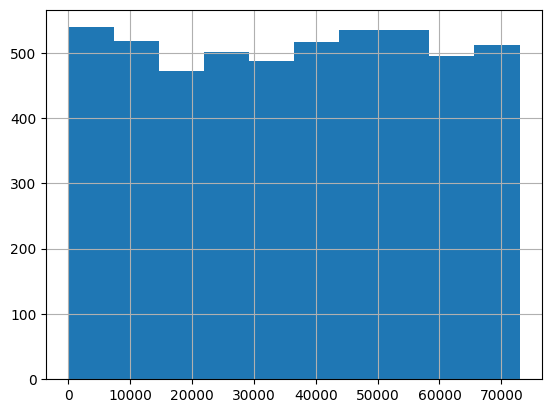

gender


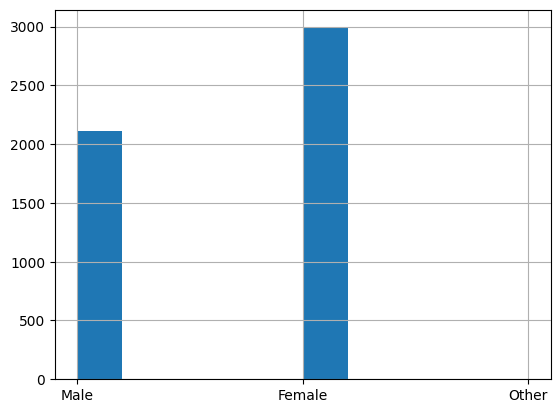

age


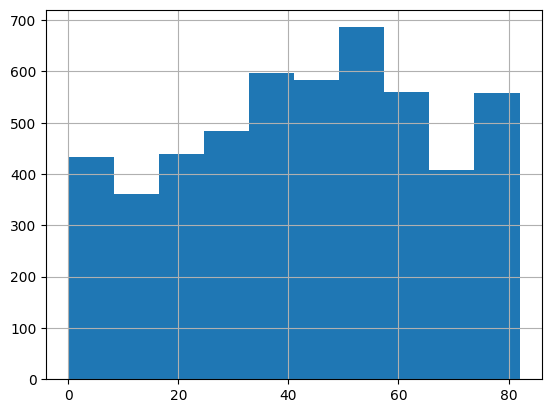

hypertension


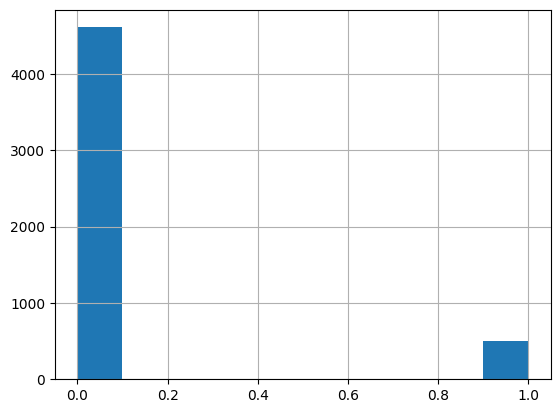

heart_disease


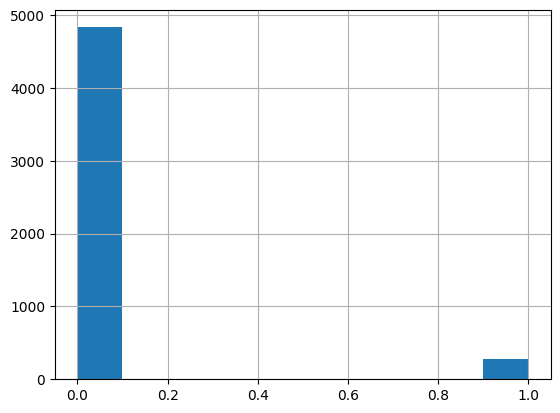

ever_married


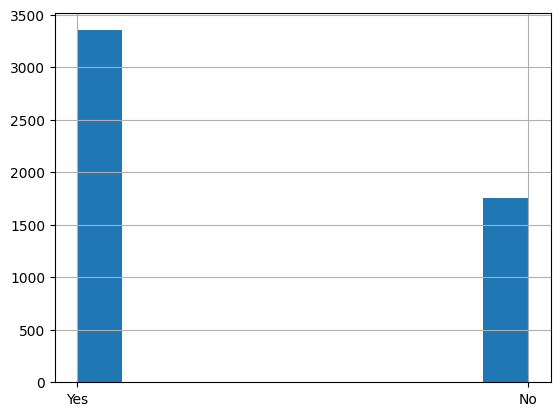

work_type


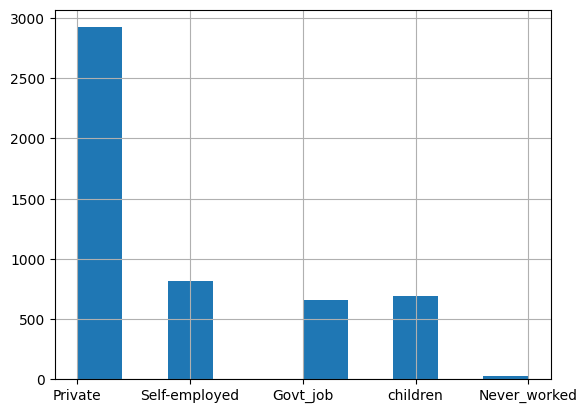

Residence_type


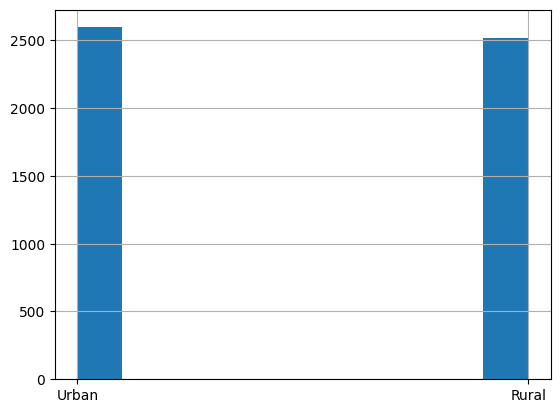

avg_glucose_level


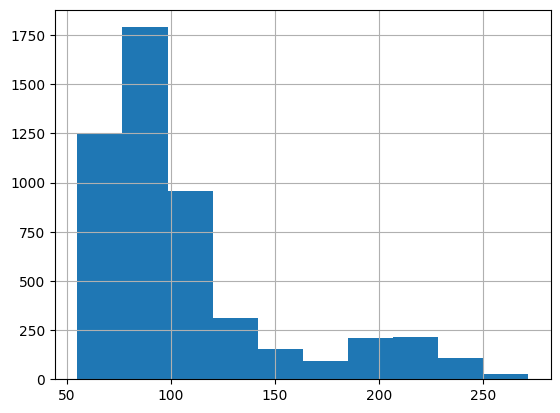

bmi


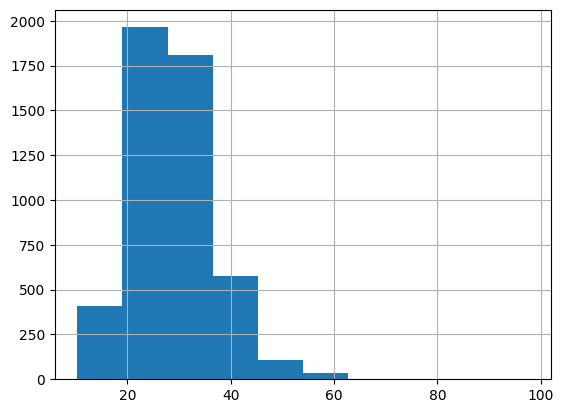

smoking_status


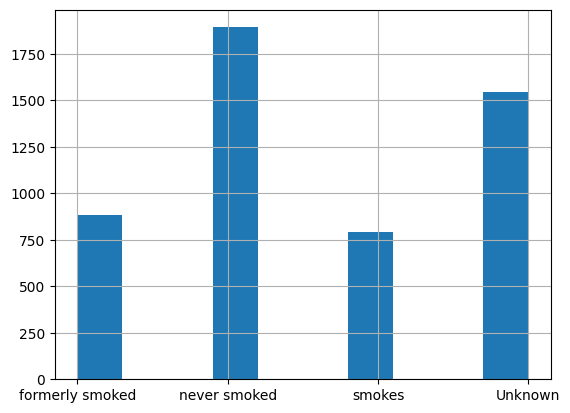

stroke


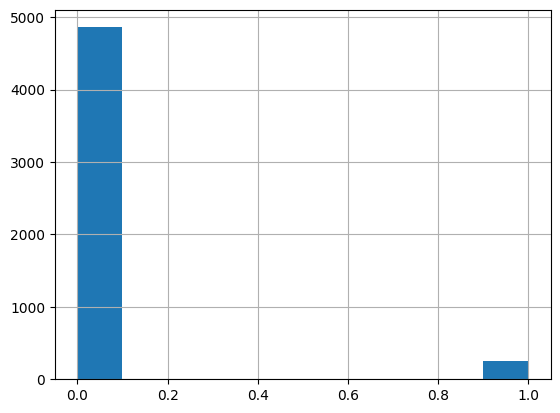

In [11]:
for col in columns:
  print(col)
  data[col].hist()
  plt.show()

In [12]:
data_loader.preprocess_data()

In [14]:
data_loader.data.head(3)

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,67.0,0,1,228.69,36.6,1
1,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,61.0,0,0,202.21,0.0,1
2,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,80.0,0,1,105.92,32.5,1


In [18]:
X_train, X_test, y_train, y_test = data_loader.get_data_split()
print(X_train.shape)
print(X_test.shape)

(4088, 21)
(1022, 21)


In [19]:
X_train, y_train = data_loader.oversample(X_train, y_train)
print("After oversampling:", X_train.shape)


After oversampling: (7778, 21)


# **Interpretable glassbox model**

In [ ]:
!pip install interpret

In [44]:
from interpret.glassbox import(LogisticRegression,
                               ClassificationTree,
                               ExplainableBoostingClassifier)
from interpret import show
from sklearn.metrics import f1_score, accuracy_score


**Logistic Regression**

In [46]:
#train logistic regression model
lr = LogisticRegression(feature_names=X_train.columns, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
#evaluate the model
y_pred = lr.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.5138996389726957
Accuracy 0.7348336594911937


In [32]:
#Explain local prediction
lr_local = lr.explain_local(X_test[:20],y_test[:20], name = 'Logistic Regression')
show(lr_local)

In [38]:
#Explain global prediction
lr_global = lr.explain_global(name='Logistic Regression')
show(lr_global)

**Classification Tree**

In [34]:
#train decision tree model
tree = ClassificationTree()
tree.fit(X_train, y_train)
#evaluate the model
y_pred = tree.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.5040090125211032
Accuracy 0.7015655577299413


In [35]:
#Explain local prediction
tree_local = tree.explain_local(X_test[:20],y_test[:20], name = 'Tree')
show(tree_local)

**Explainable Boosting Classifier**

In [37]:
#train Explainable Boosting Machine
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)
#evaluate the model
y_pred = ebm.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.5687894713747093
Accuracy 0.8776908023483366


In [41]:
#Explain local prediction
ebm_local = ebm.explain_local(X_test[:20], y_test[:20], name='EBM')
show(ebm_local)

In [68]:
#Explain global prediction
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

# **Interpretable blackbox model**

**LIME**

In [86]:
from sklearn.ensemble import RandomForestClassifier #blackbox model
from interpret.blackbox import LimeTabular
import lime

In [53]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")


F1 Score 0.5322285353535354
Accuracy 0.9432485322896281


In [87]:
# Initilize Lime for Tabular data
exp = LimeTabular(rf.predict_proba, data=X_train)

In [84]:
#Explain locally
rf_local=exp.explain_local(X_test[:20], y_test[:20], name='LIME for Random Forest')
show(rf_local)


**SHAP**

In [72]:
import shap

In [73]:
exp = shap.TreeExplainer(rf) #Tree SHAP
shap_values = exp.shap_values(X_test[0:1]) #only 1st row
#Visualize local predictions
shap.initjs()
shap.force_plot(exp.expected_value[1],shap_values[1],X_test[0:1])

In [79]:
y_test[0], rf.predict(X_test[0:1])[0]

(1, 0)

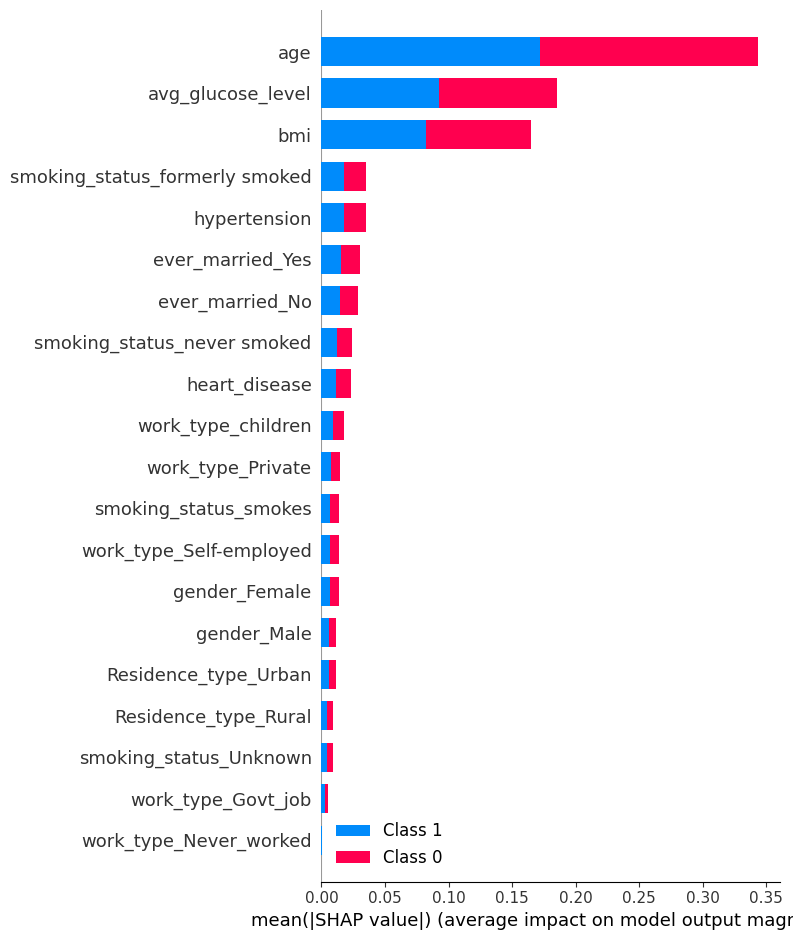

In [82]:
#Visualize global predictions
#shap_values = exp.shap_values(X_test[0:10])
shap.summary_plot(shap_values, X_test)